# Titanic

Veri seti içerisinde yolcuların bilgileri yer almakta ve yolcuların hayatta kalıp kalmadığı bilgisi de bulunmaktadır. Bu veri seti üzerinde çeşitli analizler yaparak yolcuların hayatta kalma durumunu tahmin etmeye çalışacağız. Veriyi kaggle'dan aldık. İndirmek isterseniz [tıklayınız](https://www.kaggle.com/c/titanic/data)

Cevabımız evet veya hayır olacağı için Classification algoritmaları kullanacağız.

#### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data

In [18]:
df_train = pd.read_csv("ttrain.csv")
df_test = pd.read_csv("ttest.csv")
df = pd.concat([df_train, df_test], ignore_index=True)

#### Exploratory Data Analysis

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [21]:
df.shape

(1309, 12)

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [23]:
df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [24]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [25]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [26]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
590,591,0.0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S
549,550,1.0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
525,526,0.0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
882,883,0.0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
723,724,0.0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S


#### Data Understanding

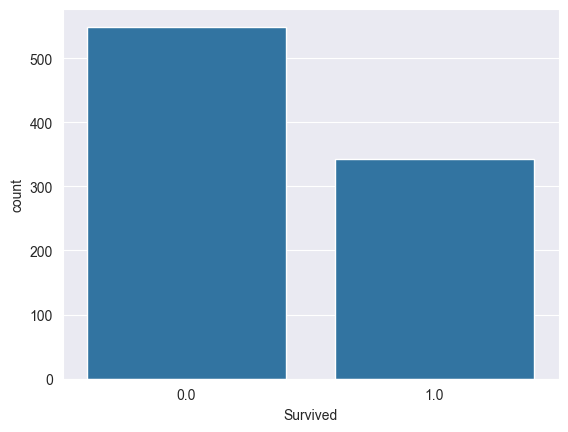

In [27]:
sns.countplot(x=df.Survived);

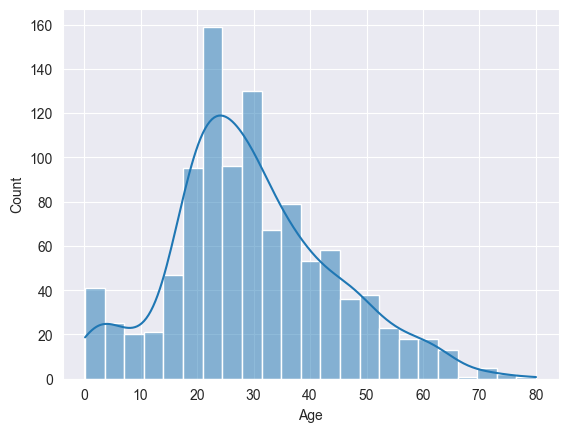

In [28]:
sns.histplot(df.Age,  kde=True);

#### Feature Engineering

In [29]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [30]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True, errors='ignore')

In [31]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

#### Train-Test Split

In [33]:
df = pd.get_dummies(df, drop_first=True)

In [34]:
train = df[df['Survived'].notnull()]
test = df[df['Survived'].isnull()]

In [48]:
x = train.drop(columns='Survived', axis=1)

In [49]:
y = train['Survived']

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
d = DecisionTreeClassifier()

In [54]:
model = d.fit(x, y)

In [55]:
pred = model.predict(test.drop(columns='Survived', axis=1))

In [56]:
pred    

array([0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [57]:
result = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': pred})

In [58]:
result.to_csv('result.csv', index=False)

In [59]:
result

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,1.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
